<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio4_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Desafio 4: Suplementos Alimentares**

## 📚 Importação de Bibliotecas



Antes de começar, vamos importar as bibliotecas necessárias para manipulação, análise e visualização dos dados.


In [1]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### 📁 Visualização Inicial

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

💻 Código

In [2]:
#configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1Fhv43MTX13YkyMxDUBNzdmZmzpZbgH1b"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'
df_suplementos = pd.read_csv(url)
df_suplementos.head()

,id_produto,id_atleta,ganho_massa,idade,frequencia_treino
0,Fórmula 3,1,2.24,27,5
1,Fórmula 1,2,4.97,35,4
2,Fórmula 3,3,0.88,30,6
3,Fórmula 3,4,0.09,22,6
4,Fórmula 1,5,2.47,18,6


### 🧽  Verificação de Valores Ausentes e Duplicatas

Nesta etapa, vamos verificar se existem valores ausentes ou registros duplicados no dataset.

Esses problemas podem impactar os resultados das análises estatísticas e visualizações, e devem ser tratados ainda na fase de pré-processamento.

**🧪 Código – Diagnóstico**

In [3]:
# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df_suplementos.isnull().sum())

# Verificar registros duplicados
duplicatas = df_suplementos.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")


🔍 Valores ausentes por coluna:
id_produto           0
id_atleta            0
ganho_massa          0
idade                0
frequencia_treino    0
dtype: int64

📦 Registros duplicados encontrados: 0


### 🔧 Padronização de Colunas e Tipos de Dados

Nesta etapa, vamos:
- Padronizar os nomes das colunas para facilitar a manipulação (ex: letras minúsculas, sem espaços)
- Garantir que as variáveis estejam nos **tipos corretos**:
  - Números contínuos como `ganho_massa`, `idade`, `frequencia_treino` devem estar como `float` ou `int`
  - A coluna `id_produto` pode ser tratada como **variável categórica**


**💻 Código – Padronização**

In [7]:
# Verificando escrita das do id produto para evitar contabilização incorreta
df_suplementos['id_produto'].unique()

['Fórmula 3', 'Fórmula 1', 'Fórmula 2']
Categories (3, object): ['Fórmula 1', 'Fórmula 2', 'Fórmula 3']

In [4]:
# Padronizar nomes das colunas
df_suplementos.columns = df_suplementos.columns.str.lower().str.strip()

# Converter colunas numéricas
col_numericas = ['ganho_massa', 'idade', 'frequencia_treino']
df_suplementos[col_numericas] = df_suplementos[col_numericas].apply(pd.to_numeric, errors='coerce')

# Garantir que id_produto seja categórico
df_suplementos['id_produto'] = df_suplementos['id_produto'].astype('category')

# Verificar os tipos atualizados
df_suplementos.dtypes

,0
id_produto,category
id_atleta,int64
ganho_massa,float64
idade,int64
frequencia_treino,int64


### 📊 Visualização Geral das Variáveis

Agora que os dados estão limpos e padronizados, vamos criar gráficos para observar a distribuição das variáveis principais:

- `ganho_massa`: nosso principal alvo de análise
- `idade` e `frequencia_treino`: variáveis que podem influenciar o resultado

Vamos usar:
- **Histogramas** para ver a distribuição
- **Boxplots** para detectar possíveis outliers

**💻 Código – Histogramas e Boxplots**

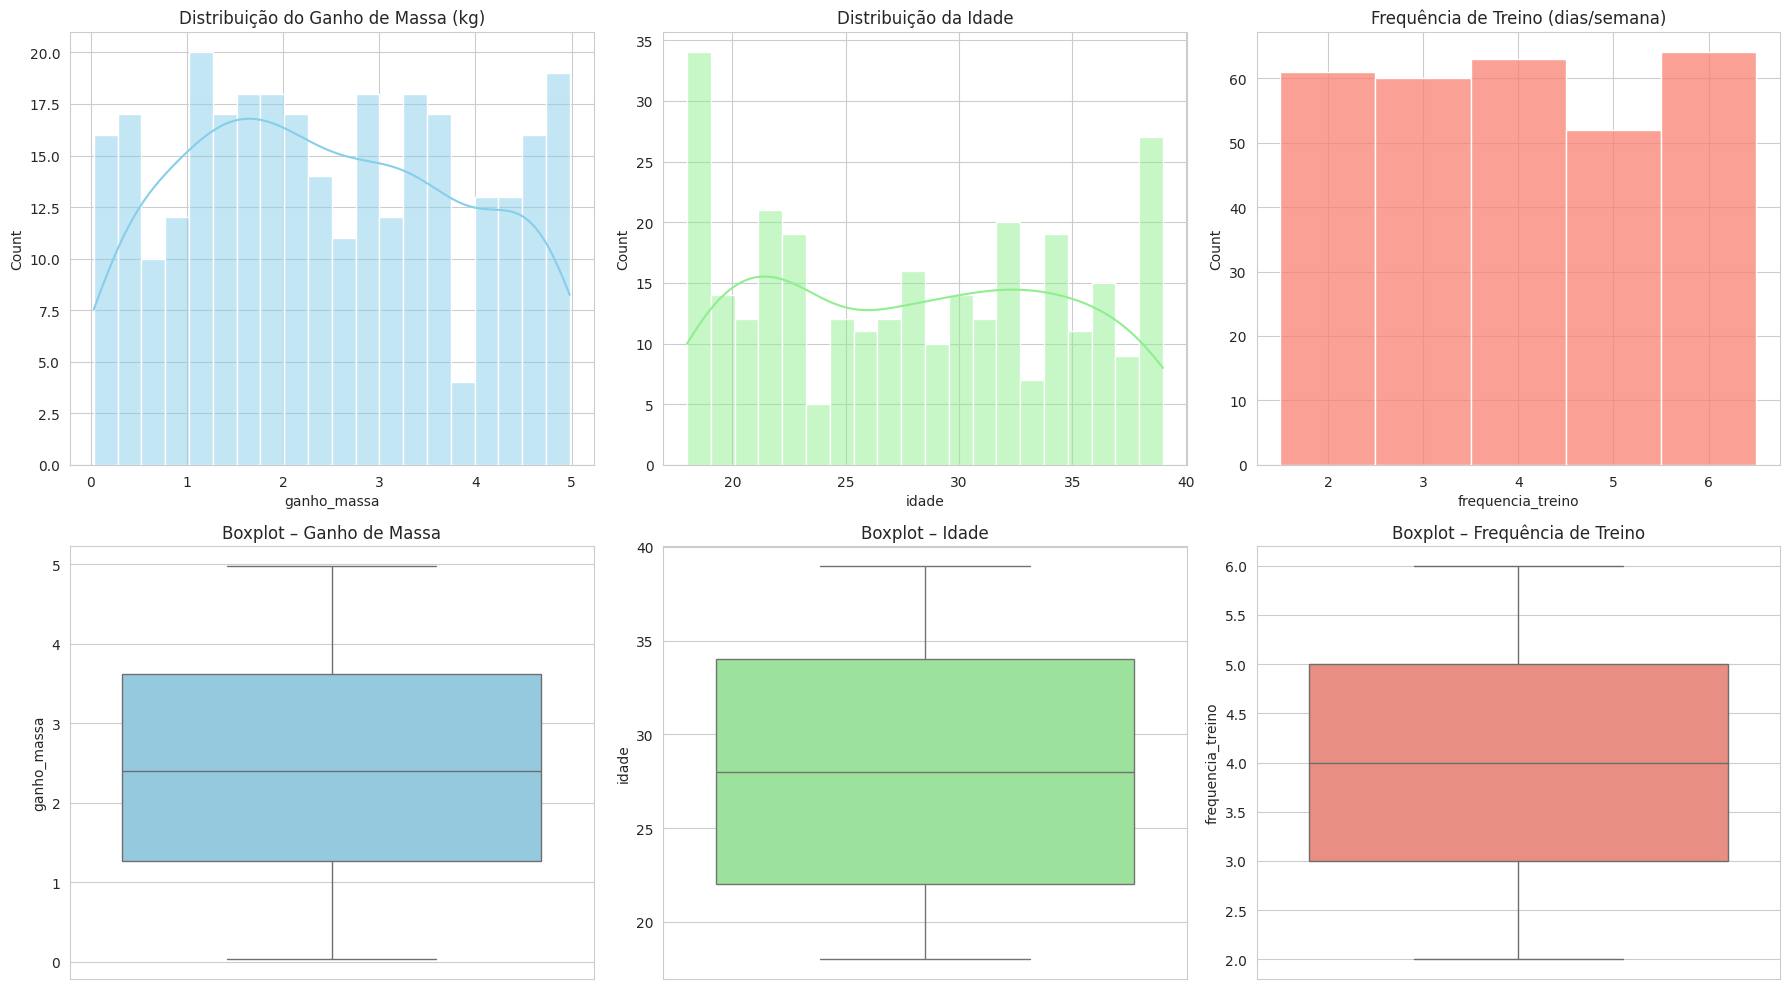

In [5]:
# Criar subplots para visualização lado a lado
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogramas
sns.histplot(df_suplementos['ganho_massa'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribuição do Ganho de Massa (kg)")

sns.histplot(df_suplementos['idade'], bins=20, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Distribuição da Idade")

sns.histplot(df_suplementos['frequencia_treino'], bins=7, discrete=True, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title("Frequência de Treino (dias/semana)")

# Boxplots
sns.boxplot(y=df_suplementos['ganho_massa'], ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title("Boxplot – Ganho de Massa")

sns.boxplot(y=df_suplementos['idade'], ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title("Boxplot – Idade")

sns.boxplot(y=df_suplementos['frequencia_treino'], ax=axes[1, 2], color='salmon')
axes[1, 2].set_title("Boxplot – Frequência de Treino")

# Ajuste final
plt.tight_layout()
plt.show()


Apresentamos a análise gráfica das variáveis `ganho_massa`, `idade` e `frequencia_treino`.

---

#### 📈 Distribuição dos Dados

1. **Ganho de Massa (kg)**  
   - A distribuição é relativamente **simétrica**, variando entre 0 e 5 kg.  
   - Há uma leve concentração de valores entre **2 e 4 kg**, sugerindo que a maioria dos atletas teve um ganho positivo moderado.

2. **Idade dos Atletas**  
   - A distribuição é um pouco **irregular**, com **picos de frequência entre 18-20 e 35-38 anos**.  
   - Há uma boa variedade etária, o que pode enriquecer as comparações entre perfis.

3. **Frequência de Treino (dias/semana)**  
   - Os valores estão distribuídos entre 2 e 6 dias por semana.  
   - A frequência é **relativamente equilibrada**, com uma leve predominância de quem treina 4 a 6 dias.

---

#### 📦 Boxplots – Avaliação de Outliers

- **Ganho de Massa**  
  - Não há outliers visíveis.  
  - A mediana gira em torno de **2,5 kg**, com boa dispersão dos dados.

- **Idade**  
  - A faixa de idade está bem concentrada entre **22 e 36 anos**.  
  - Sem outliers, mas com algumas observações bem jovens (<20 anos).

- **Frequência de Treino**  
  - Os valores estão dentro do esperado.  
  - Como é uma variável discreta (dias por semana), a variação é limitada e os valores extremos são coerentes.

---

### ✅ Conclusão

As variáveis estão com **distribuições naturais e coerentes com o contexto do estudo**. Os dados estão prontos para serem analisados por grupo (fórmula), seguindo para a próxima etapa: **Análise Exploratória por Suplemento**.


## 📊 Parte 1 – Análise Exploratória dos Dados (EDA)

Nesta etapa, vamos responder às seguintes perguntas do desafio:

1. Qual é a **média e a mediana** do ganho de massa para cada fórmula?
2. Como os dados estão distribuídos? (com histogramas e boxplots)
3. Há outliers? O que eles podem indicar?

Isso nos dará uma visão geral e comparativa do desempenho de cada suplemento.

**✅ Pergunta 1: Qual é a média e a mediana do ganho de massa para cada suplemento?**

In [13]:
resumo = df_suplementos.groupby("id_produto")["ganho_massa"].agg(["mean", "median", "std", "min", "max", "count"]).round(2)
resumo.rename(columns={
    "mean": "Média",
    "median": "Mediana",
    "std": "Desvio Padrão",
    "min": "Mínimo",
    "max": "Máximo",
    "count": "Nº de Atletas"
}, inplace=True)

resumo

<ipython-input-13-589585dee306>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumo = df_suplementos.groupby("id_produto")["ganho_massa"].agg(["mean", "median", "std", "min", "max", "count"]).round(2)


,Média,Mediana,Desvio Padrão,Mínimo,Máximo,Nº de Atletas
id_produto,,,,,,
Fórmula 1,2.66,2.67,1.39,0.09,4.98,99
Fórmula 2,2.35,2.15,1.40,0.03,4.98,94
Fórmula 3,2.39,2.35,1.51,0.08,4.97,107


**✅ Pergunta 2: Como os dados estão distribuídos? (Histogramas e Boxplots)**

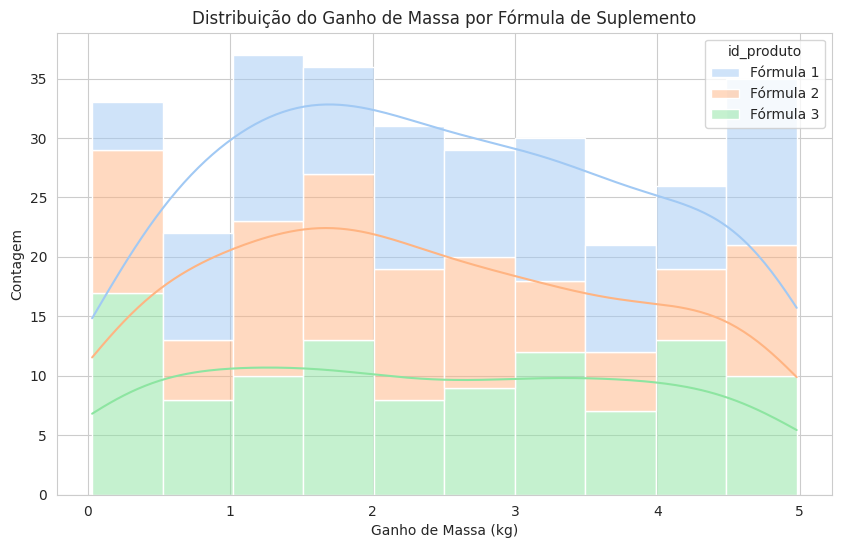

<ipython-input-14-e535d458fcb3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_suplementos, x="id_produto", y="ganho_massa", palette="Set2")


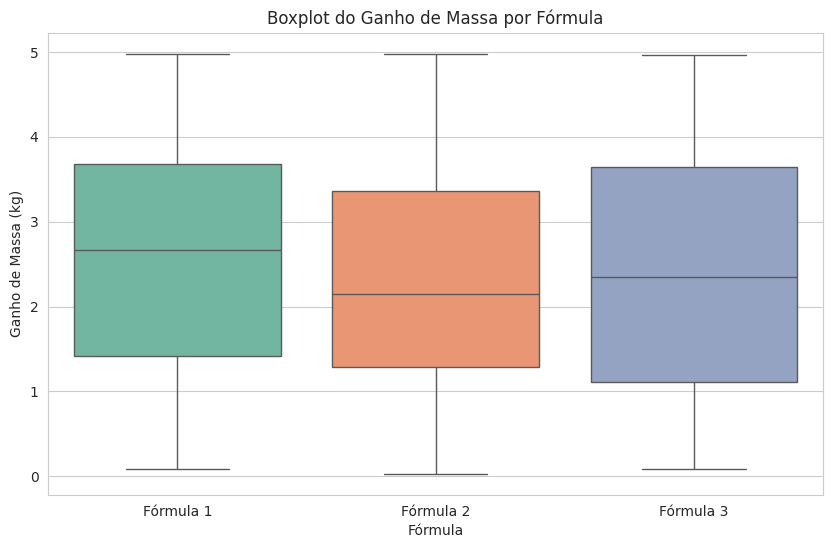

In [14]:
# Histograma com densidade
sns.histplot(data=df_suplementos, x="ganho_massa", hue="id_produto", kde=True, multiple="stack", palette="pastel")
plt.title("Distribuição do Ganho de Massa por Fórmula de Suplemento")
plt.xlabel("Ganho de Massa (kg)")
plt.ylabel("Contagem")
plt.show()

# Boxplot
sns.boxplot(data=df_suplementos, x="id_produto", y="ganho_massa", palette="Set2")
plt.title("Boxplot do Ganho de Massa por Fórmula")
plt.xlabel("Fórmula")
plt.ylabel("Ganho de Massa (kg)")
plt.show()

**✅ Pergunta 3: Há outliers? O que isso pode indicar?**

* No boxsplot, verificamos que não há presença relevante de outliers nos dados, bem como há um comportamento muito semelhante na distribuição dos percentis, sendo a formula 2, representada com maior concentração de dados em relação à média e mediana.

## 📐 Parte 2 – Teste de Hipótese (ANOVA)

**✅ Pergunta: Há diferença estatisticamente significativa no ganho de massa
muscular entre as três fórmulas?**

Agora que visualizamos as diferenças no ganho de massa por fórmula, vamos verificar se essas diferenças são **estatisticamente significativas** com o teste ANOVA.

---

### 🎯 Hipóteses do Teste

- **H₀ (nula):** As médias de ganho de massa são iguais entre os três suplementos.
- **H₁ (alternativa):** Pelo menos uma das médias é diferente.

Se o **p-valor < 0.05**, rejeitamos H₀ e concluímos que há diferença significativa.

**💻 Código – ANOVA**

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


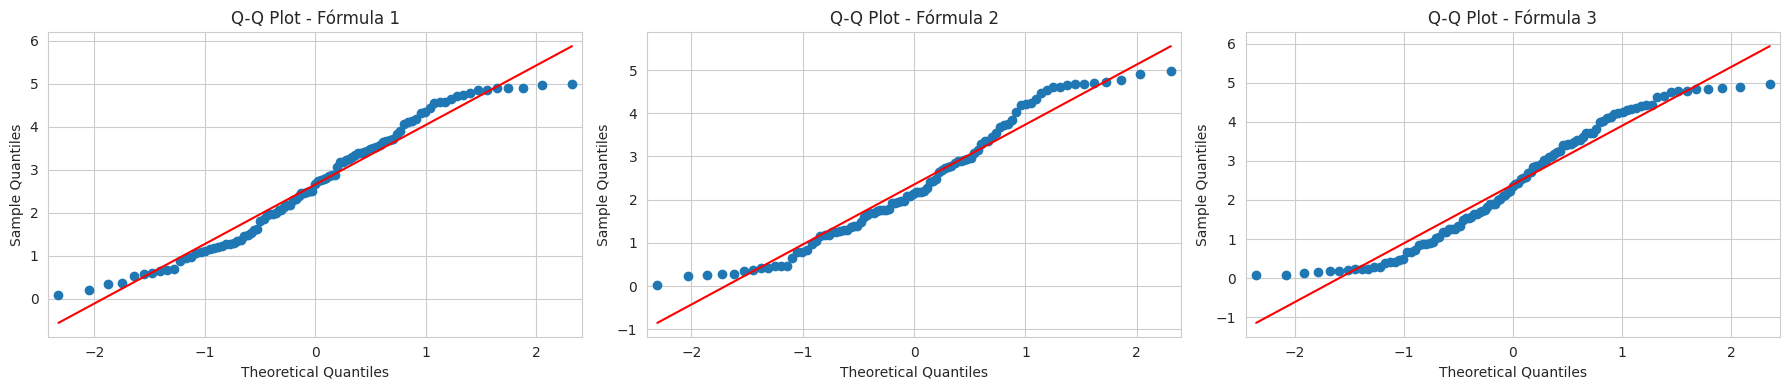

In [16]:
#Passo 1 - analisando a normalidade

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Lista de fórmulas
formulas = ['Fórmula 1', 'Fórmula 2', 'Fórmula 3']

# Cores personalizadas
custom_palette = ['lightskyblue', 'lightgreen', 'salmon']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Gerar Q-Q plot para cada fórmula
for i, formula in enumerate(formulas):
    grupo = df_suplementos[df_suplementos['id_produto'] == formula]['ganho_massa']
    sm.qqplot(grupo, line='s', ax=axes[i], color=custom_palette[i])
    axes[i].set_title(f'Q-Q Plot - {formula}', fontsize=12)

plt.tight_layout()
plt.show()

In [18]:

from scipy.stats import f_oneway

# Separar os grupos
f1 = df_suplementos[df_suplementos["id_produto"] == "Fórmula 1"]["ganho_massa"] # Changed df to df_suplementos
f2 = df_suplementos[df_suplementos["id_produto"] == "Fórmula 2"]["ganho_massa"] # Changed df to df_suplementos
f3 = df_suplementos[df_suplementos["id_produto"] == "Fórmula 3"]["ganho_massa"] # Changed df to df_suplementos

# Aplicar ANOVA
stat, p = f_oneway(f1, f2, f3)
print("Resultado do ANOVA:")
print(f'Valor de stat: {stat:.2f}')
print(f'Valor de p: {p:.4f}')


Resultado do ANOVA:
Valor de stat: 1.32
Valor de p: 0.2697


### 🧪 Resultado do Teste ANOVA

- Estatística F = 1.32
- **p-valor = 0.2697**

---

### 🎯 Conclusão

Como o **p-valor é maior que 0.05**, **não rejeitamos a hipótese nula**.

✅ Isso significa que **não há diferença estatisticamente significativa** entre os suplementos no ganho de massa muscular.

Mesmo que visualmente a Fórmula 1 pareça melhor, **a variação entre os grupos pode ser explicada pelo acaso** (variação natural dos indivíduos).

---

📌 Portanto, **não é necessário aplicar o teste Tukey HSD**, pois o ANOVA já indicou que os grupos não diferem de forma estatisticamente significativa.

## 🔗 Parte 3 – Análise de Correlação entre idade e ganho de massa muscular

**✅ Pergunta 1: Existe correlação entre idade e ganho de massa muscular?**

**✅ Pergunta 2: Atletas mais jovens ou mais velhos têm resultados diferentes?**



Vamos utilizar o **coeficiente de correlação de Pearson**, que varia entre -1 e 1:
- Valores próximos de **+1** indicam correlação positiva forte
- Valores próximos de **-1** indicam correlação negativa forte
- Valores próximos de **0** indicam ausência de correlação

**💻 Código – Cálculo das correlações**


In [27]:
# Correlação entre idade e ganho de massa
cor_idade = df_suplementos["ganho_massa"].corr(df_suplementos["idade"]) # Changed df to df_suplementos
print(f"🔹 Correlação entre idade e ganho de massa: {cor_idade:.2f}")

🔹 Correlação entre idade e ganho de massa: -0.07


<ipython-input-21-d7c208c12a35>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='faixa_etaria', y='ganho_massa', data=df_suplementos, palette=custom_palette)


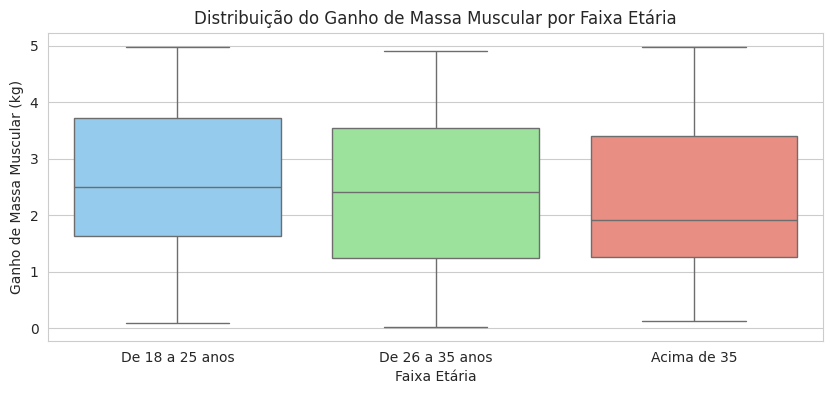

In [21]:
# Paleta personalizada
custom_palette = ['lightskyblue', 'lightgreen', 'salmon']

plt.figure(figsize=(10, 4))

# Dividir em faixas etárias
faixas_etarias = ['De 18 a 25 anos', 'De 26 a 35 anos', 'Acima de 35']
df_suplementos['faixa_etaria'] = pd.cut(df_suplementos['idade'], bins=[18, 25, 35, float('inf')],
                                        labels=faixas_etarias, include_lowest=True, right=False)

# Comparar o ganho de massa muscular entre as faixas etárias
sns.boxplot(x='faixa_etaria', y='ganho_massa', data=df_suplementos, palette=custom_palette)
plt.title('Distribuição do Ganho de Massa Muscular por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Ganho de Massa Muscular (kg)')
plt.show()

* Através do resultado da correlação de Pearson nota-se que o resultado está muito próximo à zero, indicando que não há correlação entre idade e ganho de massa nesse conjunto de dados.

* É possível observar no boxplot que a divisão dos percentis dos dados também estão muito próximas, com um pequeno achatamento para o grupo acima de 35 anos, não indicando uma grande correlação nesse caso quando comparado o resultado geral

Vamos analisar os dados por cada uma das formulas separadamente

In [28]:
# Analisando cada fórmula separadamente
for produto in df_suplementos['id_produto'].unique():
    # Filtrando dados por fórmula
    df_produto = df_suplementos[df_suplementos['id_produto'] == produto]

    # Correlação de Pearson entre idade e ganho de massa muscular
    correlacao = df_produto['idade'].corr(df_produto['ganho_massa'])

    # Exibindo os resultados
    print(f'Correlação de Pearson para a Fórmula {produto}: {correlacao:.4f}')

Correlação de Pearson para a Fórmula Fórmula 3: -0.0404
Correlação de Pearson para a Fórmula Fórmula 1: 0.0397
Correlação de Pearson para a Fórmula Fórmula 2: -0.2469


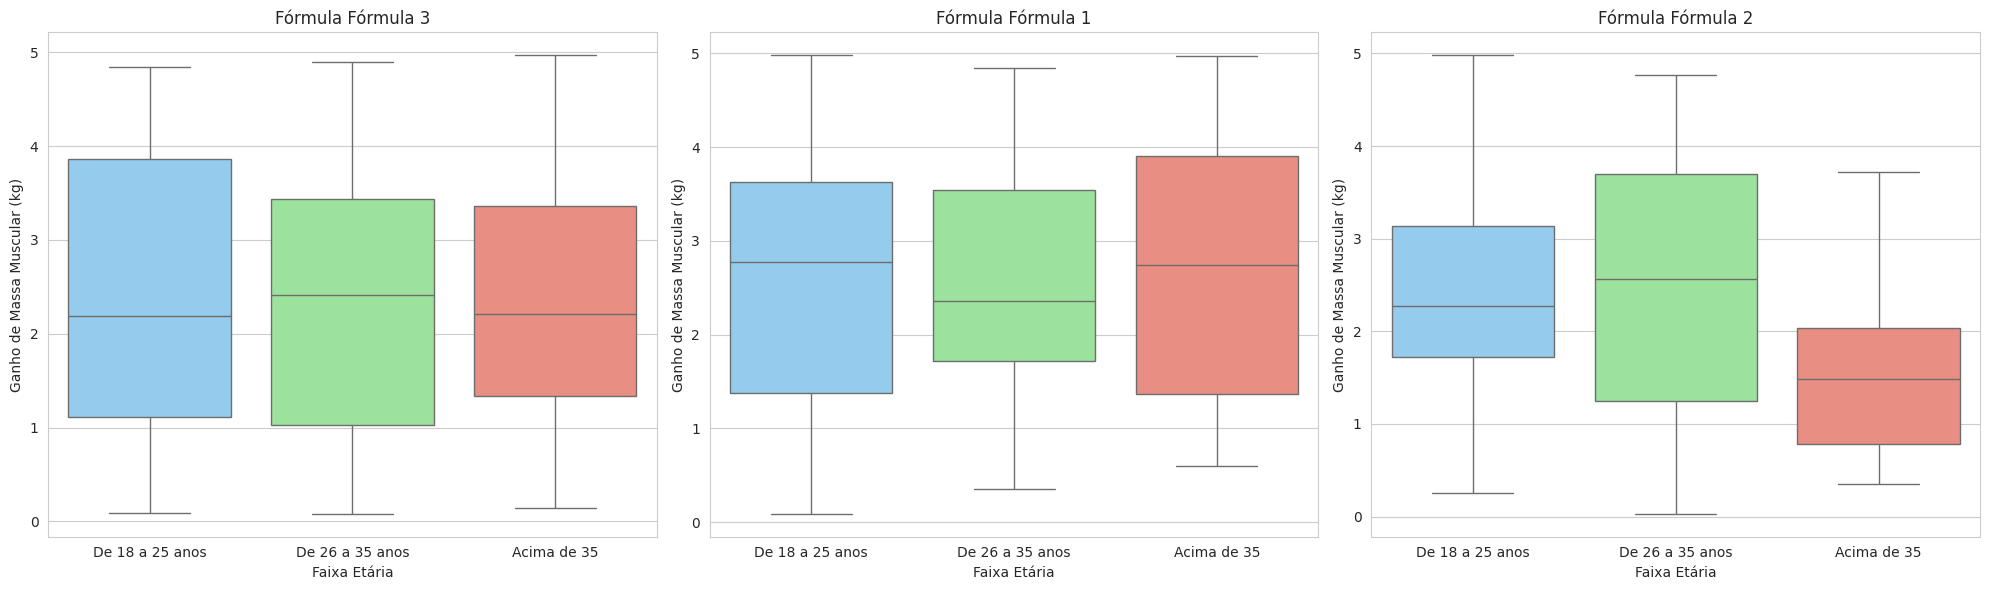

In [29]:
# Paleta de cores
#custom_palette = sns.color_palette('Set2')

# Analisando Boxplot para cada fórmula e faixa etária
fig, axes = plt.subplots(nrows=1, ncols=len(df_suplementos['id_produto'].unique()), figsize=(20, 6))

# Caso haja apenas uma fórmula, o axes será um único objeto e não uma lista
if len(df_suplementos['id_produto'].unique()) == 1:
    axes = [axes]

# Gerar os boxplots
for i, produto in enumerate(df_suplementos['id_produto'].unique()):
    # Filtrando dados por fórmula
    df_produto = df_suplementos[df_suplementos['id_produto'] == produto].copy()

    # Criar uma nova coluna para a faixa etária
    #faixas_etarias = ['De 18 a 25 anos', 'De 26 a 35 anos', 'Acima de 36']
    #df_produto['faixa_etaria'] = pd.cut(df_produto['idade'], bins=[18, 25, 35], labels=faixas_etarias)

    # Criar uma nova coluna para a faixa etária
    faixas_etarias = ['De 18 a 25 anos', 'De 26 a 35 anos', 'Acima de 35']
    df_produto['faixa_etaria'] = pd.cut(df_produto['idade'], bins=[18, 25, 35, float('inf')],
                                        labels=faixas_etarias, include_lowest=True, right=False) # Adjust bins and include_lowest

    # Gerar o boxplot para cada fórmula
    sns.boxplot(x='faixa_etaria', y='ganho_massa', data=df_produto, hue='faixa_etaria',
            palette=custom_palette, ax=axes[i], legend=False)
    axes[i].set_title(f'Fórmula {produto}')
    axes[i].set_xlabel('Faixa Etária')
    axes[i].set_ylabel('Ganho de Massa Muscular (kg)')

# Ajustar o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()


* Aqui é possível notar que na fórmula 2 há uma uma redução no ganho de massa para idade da faixa etaria acima de 35 anos no entanto, ainda próximo a zero, o que indica que não há uma correlação forte entre as variáveis.

## 🔗 Parte 4 – Análise de Correlação entre número de treinos e ganho de massa muscular

** Pergunta: Atletas que treinam mais frequentemente ganham mais massa
muscular independentemente do suplemento? **

In [30]:
# Correlação entre frequência de treino e ganho de massa
cor_treino = df_suplementos["ganho_massa"].corr(df_suplementos["frequencia_treino"]) # Changed df to df_suplementos
print(f"🔹 Correlação entre frequência de treino e ganho de massa: {cor_treino:.2f}")

🔹 Correlação entre frequência de treino e ganho de massa: 0.08


<ipython-input-23-1661ef977135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='frequencia_treino', y='ganho_massa', data=df_suplementos, palette=custom_palette)
<ipython-input-23-1661ef977135>:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='frequencia_treino', y='ganho_massa', data=df_suplementos, palette=custom_palette)


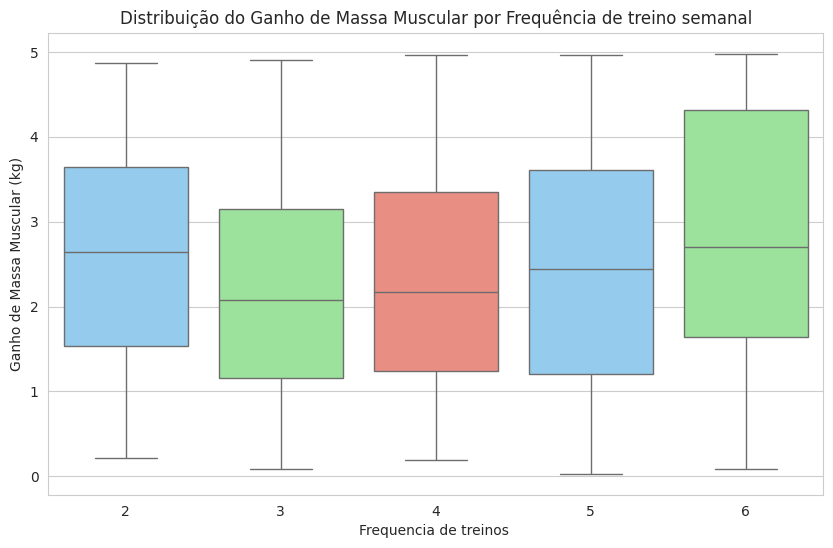

In [23]:
# Comparar o ganho de massa muscular entre as frequências de treinamento
sns.boxplot(x='frequencia_treino', y='ganho_massa', data=df_suplementos, palette=custom_palette)
plt.title('Distribuição do Ganho de Massa Muscular por Frequência de treino semanal')
plt.xlabel('Frequencia de treinos ')
plt.ylabel('Ganho de Massa Muscular (kg)')
plt.show()

* Nota-se que o grupo com uma frequência de treinamento de 6 vezes por semana apresenta uma maior variação dos dados de ganho de massa, com uma dispersão e amplitude maior. No entando, a mediana dos dados mantem-se muito próxima das demais categorias. Além disso, o teste de correção com resultado muito próximo a zero, indica que não há uma relação linear clara entre a frequencia de treinamento e o ganho de massa.

In [33]:
# Teste de hipótese 2 para cada fórmula
# H0: frequência de treino não influencia o ganho de massa muscular
# H1: frequência de treino influencia o ganho de massa muscular

for produto in df_suplementos['id_produto'].unique():
    df_produto = df_suplementos[df_suplementos['id_produto'] == produto]

    correlacao = df_produto['frequencia_treino'].corr(df_produto['ganho_massa'])

    print(f'Fórmula {produto}: correlação entre frequência de treino e ganho de massa muscular = {correlacao:.4f}')

Fórmula Fórmula 3: correlação entre frequência de treino e ganho de massa muscular = 0.1500
Fórmula Fórmula 1: correlação entre frequência de treino e ganho de massa muscular = 0.0461
Fórmula Fórmula 2: correlação entre frequência de treino e ganho de massa muscular = 0.0200


<ipython-input-34-c64b4c2cdf10>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-c64b4c2cdf10>:15: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
<ipython-input-34-c64b4c2cdf10>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-34-c64b4c2cdf10>:15: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
<ipython-input-34-c64b4c2cdf10>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

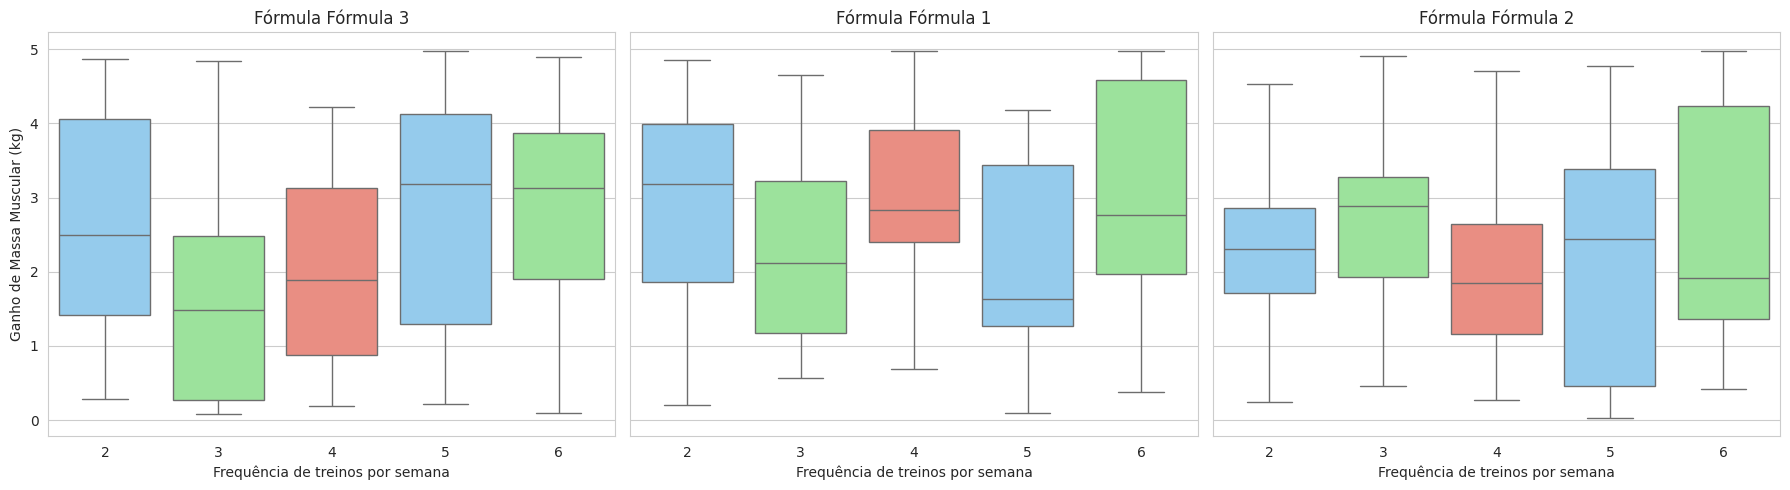

In [34]:
# Obter os produtos únicos
produtos = df_suplementos['id_produto'].unique()

# Criar uma figura com subplots (um para cada fórmula)
fig, axes = plt.subplots(1, len(produtos), figsize=(6 * len(produtos), 5), sharey=True)

# Garantir que axes seja uma lista mesmo com um único subplot
if len(produtos) == 1:
    axes = [axes]

# Loop por fórmula
for i, produto in enumerate(produtos):
    df_produto = df_suplementos[df_suplementos['id_produto'] == produto]

    sns.boxplot(
        x='frequencia_treino',
        y='ganho_massa',
        data=df_produto,
        palette=custom_palette,
        ax=axes[i]
    )

    axes[i].set_title(f'Fórmula {produto}')
    axes[i].set_xlabel('Frequência de treinos por semana')
    axes[i].set_ylabel('Ganho de Massa Muscular (kg)')

plt.tight_layout()
plt.show()


### 📈 Correlação entre variáveis

- 🔹 Correlação entre **idade** e **ganho de massa**: -0.07  
  ⟶ Correlação **negativa fraca**, ou seja, **idade praticamente não interfere** no ganho de massa.

- 🔹 Correlação entre **frequência de treino** e **ganho de massa**: +0.08  
  ⟶ Correlação **positiva fraca**, indicando que **treinar mais pode ajudar levemente**, mas **não é um fator determinante isolado**.

- 🔹 É possível observar no boxplot que a divisão dos percentis dos dados também estão muito próximas, com um pequeno achatamento para o grupo acima de 35 anos, não indicando uma grande correlação nesse caso quando comparado o resultado geral

📌 Conclusão: Nenhuma das variáveis possui correlação forte com o ganho de massa. Isso reforça a ideia de que **o efeito do suplemento depende de múltiplos fatores combinados**.


**💻 Código – Heatmap**


## 🔗 Parte 5 Correlação entre idade, frequencia de treino e suplemento

**✅ Pergunta: Existe alguma correlação entre idade, frequência de treino e a
eficácia do suplemento?**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


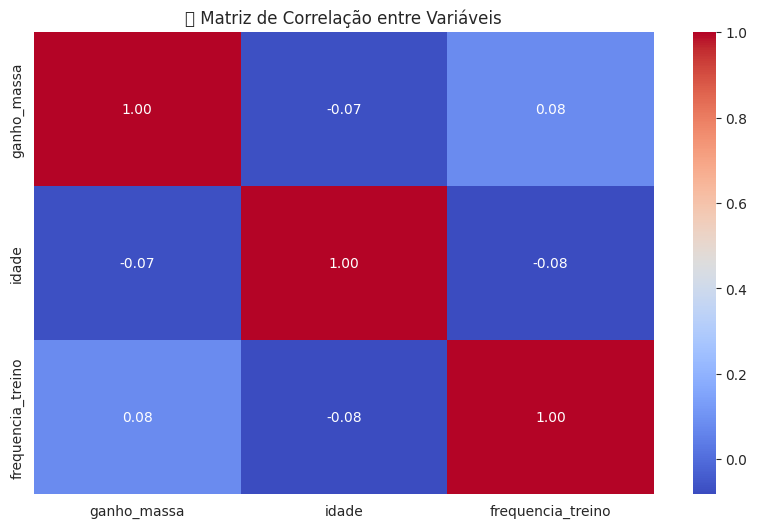

In [25]:
# 📊 Matriz de correlação visual
sns.heatmap(
    df_suplementos[["ganho_massa", "idade", "frequencia_treino"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("📊 Matriz de Correlação entre Variáveis")
plt.show()


O heatmap confirma o que os coeficientes numéricos já indicaram:

- A coloração próxima do **branco no centro** indica correlação fraca entre as variáveis.
- A **frequência de treino** aparece com tom levemente azulado positivo com o ganho de massa.
- A **idade** tem tom levemente avermelhado com o ganho de massa, indicando correlação negativa leve.

📌 O gráfico reforça que **não há relação linear forte** entre idade, treino e ganho muscular nesta amostra.


## 🏋️ Parte 6 – Recomendação para Atletas que Treinam Mais de 5 Vezes por Semana

**✅ Pergunta: Qual fórmula você recomendaria para atletas que treinam mais de 5
vezes por semana? Justifique sua escolha**

Vamos verificar qual suplemento apresentou maior ganho de massa **entre os atletas que treinam mais de 5 dias por semana**.

Esse tipo de análise nos ajuda a entender **quais fórmulas são mais eficazes para perfis específicos de usuários**, mesmo quando a média geral não apresenta diferença estatisticamente significativa.

In [26]:
# 🎯 Filtrar atletas com alta frequência de treino
freq_alta = df_suplementos[df_suplementos["frequencia_treino"] > 5] # Changed df to df_suplementos

# 📊 Calcular a média de ganho de massa por fórmula neste grupo
media_alta_freq = freq_alta.groupby("id_produto")["ganho_massa"].mean().round(2)
print("📈 Média de ganho de massa por suplemento entre atletas que treinam mais de 5x/semana:")
print(media_alta_freq)

📈 Média de ganho de massa por suplemento entre atletas que treinam mais de 5x/semana:
id_produto
Fórmula 1    3.01
Fórmula 2    2.57
Fórmula 3    2.90
Name: ganho_massa, dtype: float64


<ipython-input-26-bf87571c7466>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_alta_freq = freq_alta.groupby("id_produto")["ganho_massa"].mean().round(2)


**🏁 Resultado da Análise – Atletas com Alta Frequência de Treino**

📊 Média de ganho de massa entre atletas que treinam mais de 5x/semana:

- Fórmula 1 → **3.01 kg**
- Fórmula 3 → 2.90 kg
- Fórmula 2 → 2.57 kg

✅ **Recomendação:**  
Para atletas com rotina intensa de treino (mais de 5 vezes por semana), a **Fórmula 1 foi a que proporcionou maior média de ganho de massa muscular**.

🔎 Mesmo que a ANOVA geral não tenha apontado diferença significativa entre os suplementos, esse recorte sugere que **o perfil do usuário influencia bastante a resposta ao produto**.

## ✅ Parte 8 – Conclusão Geral e Recomendações

Após uma análise estatística e exploratória dos dados do desafio sobre ganho de massa com diferentes fórmulas de suplementos, obtivemos os seguintes insights:

---

### 🔍 Principais Conclusões

- 📏 **Não houve diferença estatística significativa** no ganho de massa entre os três suplementos (p-valor = 0.26, ANOVA).
- 📉 **A idade dos atletas não apresentou correlação relevante** com o ganho de massa (r = -0.07).
- 📈 **A frequência de treino teve leve correlação positiva** com o ganho de massa (r = 0.08), sugerindo influência marginal.
- 📦 **A Fórmula 1 apresentou a maior média geral de ganho de massa**, mas sem diferença estatística significativa.
- 🏋️‍♂️ **Para atletas que treinam mais de 5 vezes por semana**, a Fórmula 1 apresentou o melhor desempenho (3.01 kg).

---

### 📌 Recomendações

1. ✅ Para atletas com alta frequência de treino, **a Fórmula 1 pode ser recomendada** como a mais promissora.
2. 🧪 Sugerimos novos estudos com:
   - Amostras maiores
   - Controle de variáveis como dieta e intensidade de treino
3. 📊 Personalizar a recomendação de suplemento considerando o **perfil de treino do atleta** pode gerar melhores resultados.

---

🎯 **Mensagem Final**  
Este estudo mostrou que embora não tenhamos evidência de superioridade estatística entre as fórmulas, existem **tendências importantes por subgrupo** que podem auxiliar na personalização e efetividade das recomendações.